# DSCI 510 Final Project
## Fall 2020

#### 1. Your name
Madeleine Thompson

#### 2. Any major "gotchas" to the code?
It takes a while to scrape all of the data, so I recommend just using the data (SQL database file) that I have provided for this notebook. Also, I wasn't able to finish the statistical analysis that I set out to do initially.

#### 3. Any libraries that need to be installed to run your code?
You will need Matplotlib, Pandas, NumPy, and SQLite3, but these should all be a part of the standard Anaconda distribution.

#### 4. Anything else you feel is relevant?
No.

#### 5. What did you set out to study?
In this project, I wanted to be able to see if there is a relationship between the median income in a neighborhood (quantified by zip code), the population of that neighborhood, and the amount of electric vehicle charging locations and vegetarian/ vegan restaurants in that neighborhood. I wanted to be able to see a distinct pattern in this data and be able to analyze the trend to gain insight on how income affects access to electric vehicles and vegan/ vegetarian food in a neighborhood.

#### 6. What did you discover/ what are your conclusions?
I discovered that there is no significant correlation between the median income and the amount of electric vehicle charging locations or the amount of vegan restaurants in a neighborhood. There is a slightly more significant correlation between the population and the amount of EV charging locations or vegan/ vegetarian restaurants, and there is a trend that the neighborhoods that are most densely packed with EV charging locations and vegetarian/ vegan restaurants are those that are more commercial in nature (low income/ low population) and middle-class neighborhoods. Most interestingly, though, is the correlation between the number of vegetarian/ vegan restaurants and EV charging locations - I thought that there would be a very strong positive correlation between the two variables, but the R<sup>2</sup> value is only about 0.30. I need to collect more data and run more analyses in order to make any more conclusions.

#### 7. What difficulties did you have in completing the project?
I had a hard time getting some of the data that I used for this project. I originally intended to scrape vegan and vegetarian restaurant data from HappyCow, a vegan website that lists all vegan and vegetarian restaurants near a specified location, but I was unable to access their API or manually scrape from their website due to their use of Incapsula, which is an anti-scraping technology. I then had to pivot to scraping data from Yelp's API, which has far more data than HappyCow, and I'm not sure if I was really able to get all of the data that I was interested in because of the way the API queries are structured. I also had a hard time visualizing the data since I don't have very much experience doing that, and I think if I had more experience or more time to explore the various visualization libraries and try some different things, I could have come up with some better visualizations of my data that would maybe tell a different story.

#### 8. What skills did you wish you had while you were completing the project?
I wish that I had better visualization and data analysis skills while I was completing this project. While I was able to harness and improve on the skills that I do have, I don't feel like this project was as creative or explorative as I would have liked it to be since I felt very constrained to my narrow skillset while I was planning out my project. Overall, this project really tested the limits of my Python skills and has highlighted a few areas that I want to spend more time improving on in my free time.

#### 9. What would you do next to expand or augment the project?
I would love to be able to expand this project to encompass different parts of the country to see how these trends hold up in places like the Midwest and the East Coast, which have very different demographics than California. I would also be interested in studying how the introduction of electric vehicle charging locations and vegan/ vegetarian restaurants affects a community, and if I could possibly quantify gentrification of a neighborhood by studying these variables over time.

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

conn = sqlite3.connect('data/final_project.db')
cur = conn.cursor()

query = '''SELECT zipcode, median_income, current_pop, COUNT(DISTINCT charging_locations_table.name) AS num_charging_stations,
        COUNT(DISTINCT restaurant_locations_table.name) AS num_veg_restaurants
        FROM zipcode_table
        LEFT JOIN charging_locations_table ON zipcode_table.zip_id = charging_locations_table.zip_id
        LEFT JOIN restaurant_locations_table ON zipcode_table.zip_id = restaurant_locations_table.zip_id
        WHERE median_income > 0
        GROUP BY charging_locations_table.zip_id, restaurant_locations_table.zip_id
        ORDER BY zipcode'''

df = pd.read_sql_query(query, conn)

df = df.set_index('zipcode')

conn.close()

Let's take a look at the data that we are interested in:

In [2]:
df.head()

,median_income,current_pop,num_charging_stations,num_veg_restaurants
zipcode,,,,
90001,38521,58009,2,1
90002,35410,53396,6,0
90003,37226,74723,6,0
90004,48754,65539,2,3
90005,35149,45630,4,0


Now, we want to plot the raw data that we have collected in order to see if there is a correlation between the median income and the number of vegetarian and vegan restaurants in a ZIP code. The scatter plot below shows this data.

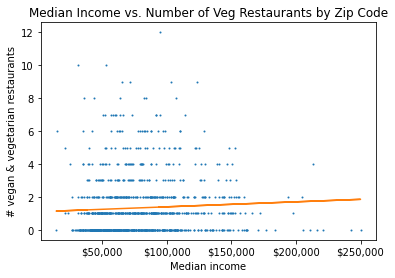

In [3]:
fig, ax = plt.subplots()

ax.plot(df['median_income'], df['num_veg_restaurants'], linestyle='', marker='o', markersize=1)
plt.xlabel('Median income')
plt.ylabel('# vegan & vegetarian restaurants')
plt.title('Median Income vs. Number of Veg Restaurants by Zip Code')

m, b = np.polyfit(df['median_income'], df['num_veg_restaurants'],1)
plt.plot(df['median_income'], m*df['median_income'] + b)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.show()

In [4]:
R2 = df['median_income'].corr(df['num_veg_restaurants'])
print(f"The correlation between median income and the number of vegetarian & vegan restaurants is R\u00b2 = {R2:.4f}.")

The correlation between median income and the number of vegetarian & vegan restaurants is R² = 0.0557.


The correlation is very small and thus is pretty much insignificant. If we introduce the variable of population into our analysis, will we get more significant results?

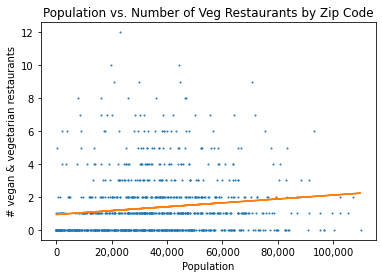

In [5]:
fig, ax = plt.subplots()

ax.plot(df['current_pop'], df['num_veg_restaurants'], linestyle='', marker='o', markersize=1)
plt.xlabel('Population')
plt.ylabel('# vegan & vegetarian restaurants')
plt.title('Population vs. Number of Veg Restaurants by Zip Code')

m, b = np.polyfit(df['current_pop'], df['num_veg_restaurants'],1)
plt.plot(df['current_pop'], m*df['current_pop'] + b)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.show()

In [6]:
R2 = df['current_pop'].corr(df['num_veg_restaurants'])
print(f"The correlation between population and the number of vegetarian & vegan restaurants is R\u00b2 = {R2:.4f}.")

The correlation between population and the number of vegetarian & vegan restaurants is R² = 0.1408.


This correlation is higher than the correlation between median income and the number of vegetarian and vegan restaurants, which indicates that there is a stronger correlation between the population in a zip code and the number of veg restaurants. However, this correlation is still very small. Let's take a look at a hexbin plot to visualize the relationship between population, median income, and the number of veg restaurants.

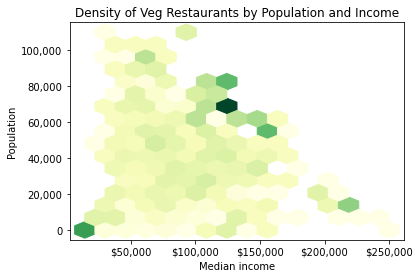

In [7]:
fig, ax = plt.subplots()

ax.hexbin(x=df['median_income'], y=df['current_pop'], C=df['num_veg_restaurants'], gridsize=15, cmap='YlGn')
plt.xlabel('Median income')
plt.ylabel('Population')
plt.title('Density of Veg Restaurants by Population and Income')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

It seems like there is a high concentration of vegetarian and vegan restaurants at places with a very small population and a very low median income around \\$10,000, as well as in upper-middle class areas with a median income around \\$120,000. This makes sense, because one would expect to find restaurants in commercial areas where the population is very low or in middle-class neighborhoods. Many upper-class neighborhoods like Beverly Hills are strictly residential, whereas middle-class neighborhoods like Silver Lake tend to be more mixed in terms of commercial and residential real estate.

Now, let's take a look at the electric vehicle charging station data.

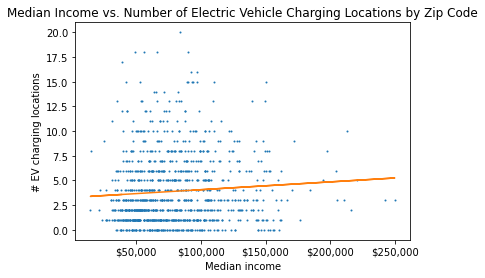

In [8]:
fig, ax = plt.subplots()

ax.plot('median_income', 'num_charging_stations', data=df, linestyle='', marker='o', markersize=1)
plt.xlabel('Median income')
plt.ylabel('# EV charging locations')
plt.title('Median Income vs. Number of Electric Vehicle Charging Locations by Zip Code')

m, b = np.polyfit(df['median_income'], df['num_charging_stations'],1)
plt.plot(df['median_income'], m*df['median_income'] + b)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

plt.show()

In [9]:
R2 = df['median_income'].corr(df['num_charging_stations'])
print(f"The correlation between median income and the number of electric vehicle charging stations is R\u00b2 = {R2:.4f}.")

The correlation between median income and the number of electric vehicle charging stations is R² = 0.0750.


There is no significant correlation between the median income and the number of EV charging stations in a neighborhood. We do notice that this correlation is ever-so-slightly higher than the correlation between income and the number of veg restaurants, though.

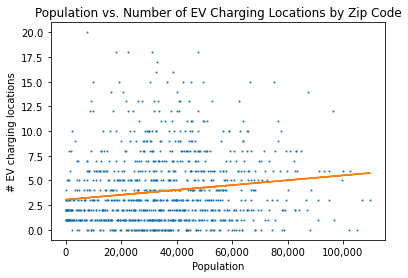

In [10]:
fig, ax = plt.subplots()

ax.plot(df['current_pop'], df['num_charging_stations'], linestyle='', marker='o', markersize=1)
plt.xlabel('Population')
plt.ylabel('# EV charging locations')
plt.title('Population vs. Number of EV Charging Locations by Zip Code')

m, b = np.polyfit(df['current_pop'], df['num_charging_stations'],1)
plt.plot(df['current_pop'], m*df['current_pop'] + b)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.show()

In [11]:
R2 = df['current_pop'].corr(df['num_charging_stations'])
print(f"The correlation between population and the number of EV charging locations is R\u00b2 = {R2:.4f}.")

The correlation between population and the number of EV charging locations is R² = 0.1515.


We get a similar R<sup>2</sup> value when evaluating the correlation between population and the number of EV charging stations. Now we will take a look at the hexbin plot in order to see the relationship between the median income, population, and number of EV charging stations in a neighborhood.

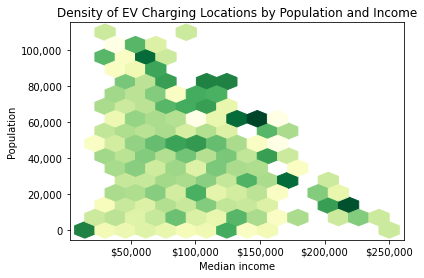

In [12]:
fig, ax = plt.subplots()

ax.hexbin(x=df['median_income'], y=df['current_pop'], C=df['num_charging_stations'], gridsize=15, cmap='YlGn')

plt.xlabel('Median income')
plt.ylabel('Population')
plt.title('Density of EV Charging Locations by Population and Income')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

We have a lot more data on electric vehicle charging locations than we do on vegetarian and vegan restaurants, so this hexbin plot is more populated than the previous one, but we still see a lot of the same trends. I think it is safe to say that although there isn't a clear-cut relationship between the median income, population, and number of EV charging locations in a ZIP code, we do see a prevalence of EV charging stations in low-income, low-population commercial areas as well as in middle-class neighborhoods. We can also see that there are more EV charging stations in more densely populated areas as well.

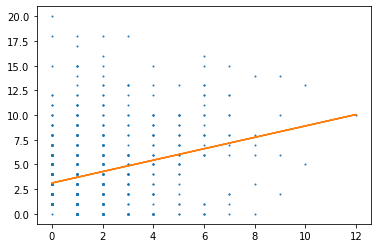

In [13]:
plt.plot(df['num_veg_restaurants'], df['num_charging_stations'], linestyle='', marker='o', markersize=1)

m, b = np.polyfit(df['num_veg_restaurants'], df['num_charging_stations'],1)
plt.plot(df['num_veg_restaurants'], m*df['num_veg_restaurants'] + b)

plt.show()

In [14]:
R2 = df['num_veg_restaurants'].corr(df['num_charging_stations'])
print(f"The correlation between the number of vegetarian & vegan restaurants and the number of EV charging locations is R\u00b2 = {R2:.4f}.")

The correlation between the number of vegetarian & vegan restaurants and the number of EV charging locations is R² = 0.2986.


When we compare the number of vegetarian and vegan restaurants in a neighborhood with the number of electric vehicle charging locations, we get a correlation of about 0.3, which is the strongest correlation thus far. However, it is still not strong enough to say definitively that wherever there is an eelctric vehicle charging station, there is a vegan or vegetarian restaurant nearby.